In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error

In [3]:
# load dataset
df=sns.load_dataset('Tips')
df[['total_bill','tip']].isnull().sum()

total_bill    0
tip           0
dtype: int64

<Axes: >

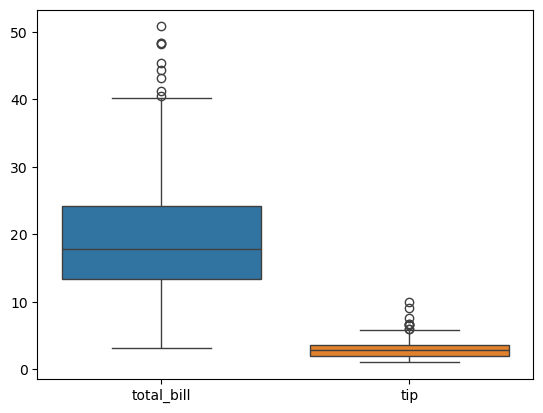

In [4]:
# handle outliers
sns.boxplot(df[['total_bill','tip']])

In [5]:
Q1=df[['total_bill','tip']].quantile(0.25)
Q3=df[['total_bill','tip']].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
condition = (
    (df['total_bill'] >= lower_bound['total_bill']) & (df['total_bill'] <= upper_bound['total_bill']) &
    (df['tip'] >= lower_bound['tip']) & (df['tip'] <= upper_bound['tip'])
)
df_cleaned=df[condition].reset_index(drop=True)
df_cleaned


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
224,35.83,4.67,Female,No,Sat,Dinner,3
225,27.18,2.00,Female,Yes,Sat,Dinner,2
226,22.67,2.00,Male,Yes,Sat,Dinner,2
227,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: >

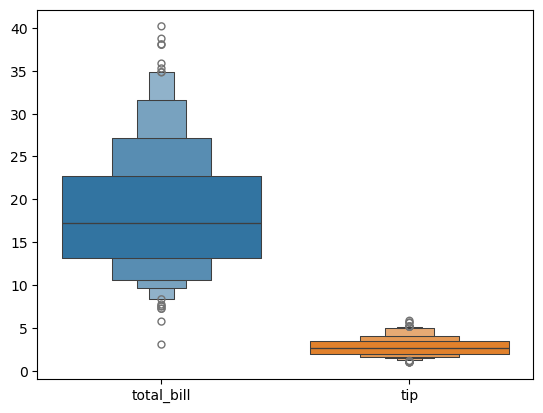

In [6]:
sns.boxenplot(df_cleaned[['total_bill','tip']])

In [7]:
Scalar=MinMaxScaler()
df_cleaned[['total_bill','tip']]=Scalar.fit_transform(df_cleaned[['total_bill','tip']])
df_cleaned

,total_bill,tip,sex,smoker,day,time,size
0,0.375202,0.002062,Female,No,Sun,Dinner,2
1,0.195957,0.136082,Male,No,Sun,Dinner,3
2,0.483558,0.515464,Male,No,Sun,Dinner,3
3,0.555526,0.476289,Male,No,Sun,Dinner,2
4,0.580054,0.538144,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
224,0.883019,0.756701,Female,No,Sat,Dinner,3
225,0.649865,0.206186,Female,Yes,Sat,Dinner,2
226,0.528302,0.206186,Male,Yes,Sat,Dinner,2
227,0.397574,0.154639,Male,No,Sat,Dinner,2


In [8]:
# split the data into X and y
X=df_cleaned[['total_bill']]
y=df_cleaned[['tip']]

In [9]:
# split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
# Call the model
model=LinearRegression()

In [11]:
# train the model
model.fit(X_train,y_train)

LinearRegression()

In [12]:
# Equation of the model
print(model.coef_)
print(model.intercept_)
print('y','=',model.coef_,'x','+',model.intercept_)

[[0.67060624]]
[0.09530605]
y = [[0.67060624]] x + [0.09530605]


In [13]:
# predict
y_pred=model.predict(X_test)
y_pred

array([[0.47380994],
       [0.31112919],
       [0.30697179],
       [0.41090672],
       [0.42988614],
       [0.58316757],
       [0.28148514],
       [0.5204451 ],
       [0.26865143],
       [0.38469704],
       [0.40946067],
       [0.41307579],
       [0.2650363 ],
       [0.3678867 ],
       [0.26756689],
       [0.52875989],
       [0.35179938],
       [0.37150182],
       [0.68746401],
       [0.17646567],
       [0.72795344],
       [0.23195788],
       [0.2493105 ],
       [0.39789226],
       [0.45229993],
       [0.34655744],
       [0.48357079],
       [0.31745566],
       [0.3695135 ],
       [0.37023653],
       [0.47850961],
       [0.37041728],
       [0.29757246],
       [0.44163531],
       [0.22653519],
       [0.40620705],
       [0.41506412],
       [0.32812029],
       [0.66938837],
       [0.29413808],
       [0.53291729],
       [0.36318703],
       [0.17556189],
       [0.3637293 ],
       [0.2323194 ],
       [0.58081773]])

In [14]:
# Evaluate the model
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2',r2_score(y_test,y_pred))

MSE 0.03223203962672043
RMSE 0.17953283718228383
R2 0.40168738705316087


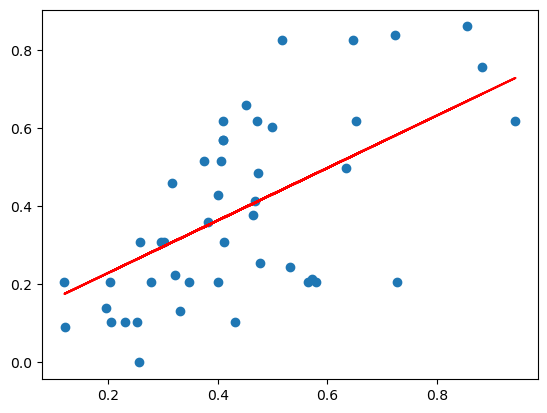

In [15]:
#plot the model
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='red')

In [17]:
# save the model
import pickle
pickle.dump(model,open('C:/Users/Laptop/ML project/Linear regression_model.pkl','wb'))